In [74]:
import os
from openai import OpenAI

In [75]:
client = OpenAI(api_key="OPENAI_KEY")

In [76]:
import pandas as pd

In [77]:
df = pd.read_csv("C://Users//user//COOP Traning//IMDB Sentimant analysis//IMDB Datasetvs2.csv")

In [78]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [79]:
df['review'] = df['review'].str.lower()

In [81]:
def get_sentiment(review):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"Please determine if the following movie review is positive or negative:\n\n{review}"}
        ],
        max_tokens=60
    )
    sentiment = response.choices[0].message.content.strip().lower()
    return 'positive' if 'positive' in sentiment else 'negative'

In [82]:
df['predicted_sentiment'] = df['review'].apply(get_sentiment)

In [83]:
from sklearn.metrics import accuracy_score, classification_report

In [84]:
df['sentiment'] = df['sentiment'].str.lower()

In [85]:
accuracy = accuracy_score(df['sentiment'], df['predicted_sentiment'])

In [86]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9494949494949495


In [87]:
print(classification_report(df['sentiment'], df['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       0.95      0.97      0.96        58
    positive       0.95      0.93      0.94        41

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



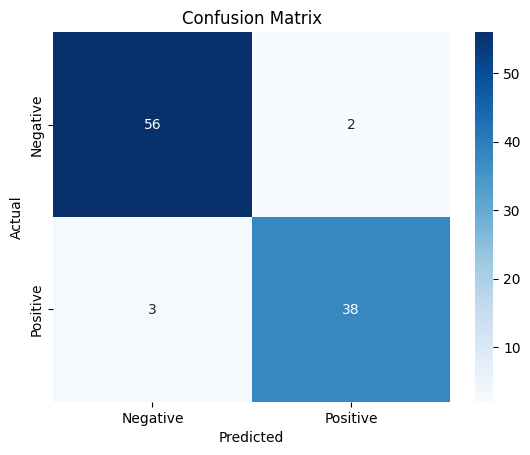

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(df['sentiment'], df['predicted_sentiment'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()